In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif

In [2]:
# Load the data
df = pd.read_csv('Thyroid Disease.csv')

In [3]:
# Data Cleaning
# Handling missing values
imputer = SimpleImputer(strategy='mean')
# Encoding categorical variables
label_encoder = LabelEncoder()

In [4]:
# Handle non-numeric data
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column].astype(str))

df_cleaned = imputer.fit_transform(df)

In [5]:
# Feature Selection
X = df_cleaned[:, :-2]  # Features, excluding Stage and Response
y = df_cleaned[:, -1]   # Response variable

selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X, y)

# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Data Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_lr))

Linear Regression MSE: 0.083548716242891


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

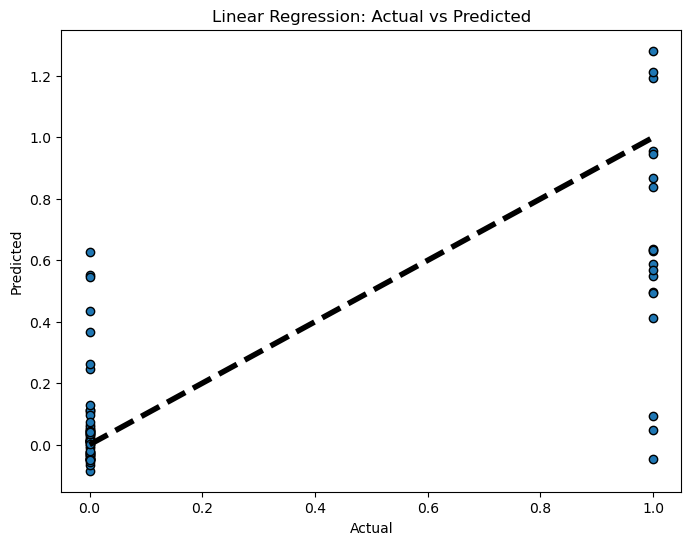

In [8]:
# Scatter plot of predicted vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()

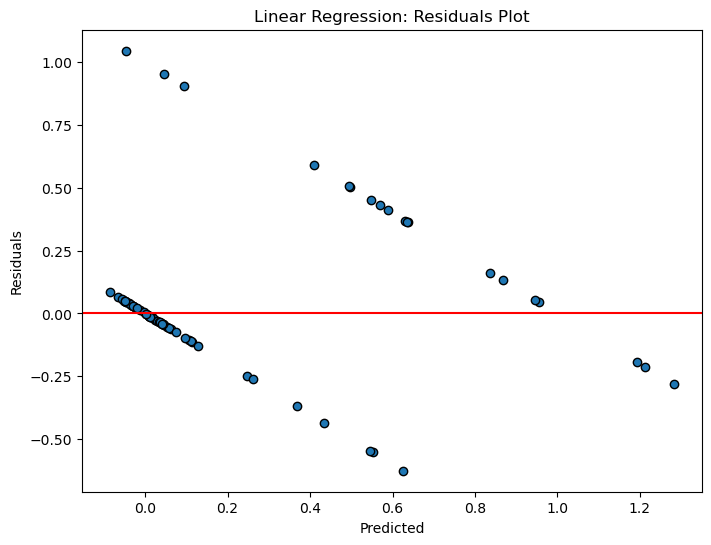

In [9]:
# Residual plot
residuals = y_test - y_pred_lr
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_lr, residuals, edgecolors=(0, 0, 0))
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Linear Regression: Residuals Plot')
plt.show()

In [10]:
# Metrics
r2 = r2_score(y_test, y_pred_lr)
print(f'R^2 Score: {r2}')

R^2 Score: 0.5504897108855711
